In [1]:
# Pré procesamento da imagem para cortar a área.
# Salva cada imagem cortada em um arquivo TIF diferente

In [1]:
import numpy as np
from glob import glob
from pyrsgis import raster
from rasterio.plot import show
import earthpy.plot as ep
import matplotlib.pyplot as plt

In [8]:
# monta os nomes dos arquivos de cada banda

#imagesPath = glob("images/recreio/2015/LO82170762015220CUB00_B[1-7].TIF")
#imagesPath = glob("images/recreio/2015/LO82170762015220CUB00_B[1-6].TIF")
imagesPath = glob("images/rj_land_5/2015/LANDSAT_5_TM_20110930_217_076_L2_BAND[1-5,7].tif")
imagesPath.sort()
imagesPath

['images/rj_land_5/2015/LANDSAT_5_TM_20110930_217_076_L2_BAND1.tif',
 'images/rj_land_5/2015/LANDSAT_5_TM_20110930_217_076_L2_BAND2.tif',
 'images/rj_land_5/2015/LANDSAT_5_TM_20110930_217_076_L2_BAND3.tif',
 'images/rj_land_5/2015/LANDSAT_5_TM_20110930_217_076_L2_BAND4.tif',
 'images/rj_land_5/2015/LANDSAT_5_TM_20110930_217_076_L2_BAND5.tif',
 'images/rj_land_5/2015/LANDSAT_5_TM_20110930_217_076_L2_BAND7.tif']

In [9]:
# Lê cada um dos arquivos e armazena em uma lista
l = []
for i in imagesPath:
  l.append(raster.read(i))

for i in l:
  print(i[1].shape)

(6847, 8135)
(6847, 8135)
(6847, 8135)
(6847, 8135)
(6847, 8135)
(6847, 8135)


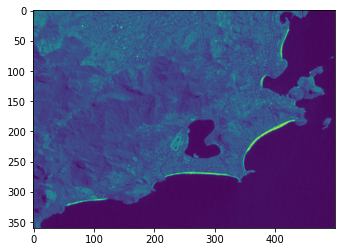

(360, 500)


In [56]:
# Corda a imagem de cada banda na região escolhida

l_aux = []
for i in l:
    # [eixo y, eixo x]
    # [3450:3650, 3500:4000] -> Recreio
    # [3190:3550, 4300:4800] -> Lagoa freitas grande
    # [3250:3450, 4450:4600] -> lagoa freitas menor
    # [3300:3600, 3700:4350] -> Região da barra da Tijuca
    # landsat 5
    # [2650:3010, 4410:4910] -> Lagoa freitas grande
    l_aux.append((i[0], i[1][2650:3010, 4410:4910])) # [(tuple)]

show(l_aux[4][1])
print(l_aux[4][1].shape)

In [57]:
# Salva a imagem cortada de cada banda em um novo arquivo TIF

# exportPath = "images/lagoa_freitas/2015/lagoa_freitas_v2_B$.TIF"
exportPath = "images/lagoa_freitas/land_5/2011/lagoa_freitas_v1_B$.tif"
for idx, aux in enumerate(l_aux):
    raster.export(aux[1], aux[0], exportPath.replace("$", str(idx+1)) )

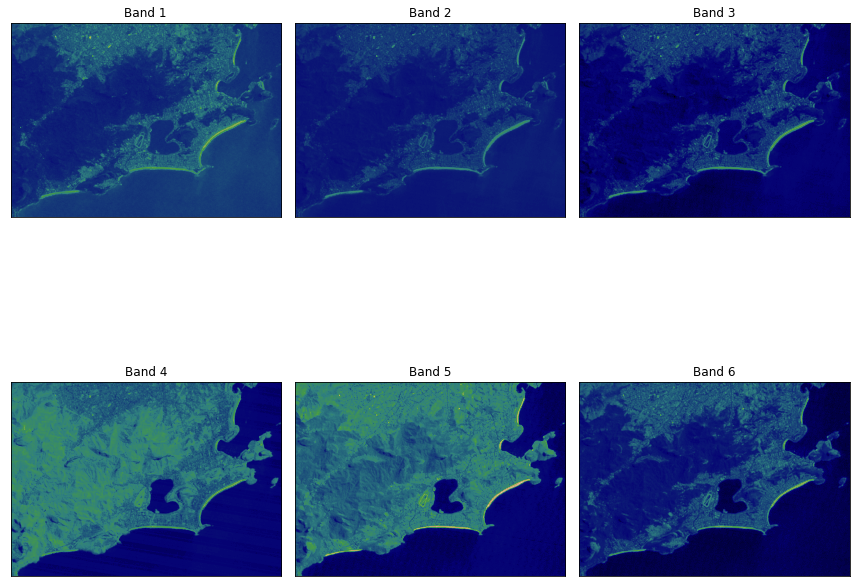

In [58]:
# coloca as 6 imagens em uma única imagem.
# Uilizado apenas para ter uma imagem para por do texto
bandsList = []
for i in l_aux:
    bandsList.append(i[1])
imagesCombinedAray = np.array(bandsList)

ep.plot_bands(
    imagesCombinedAray,
    cmap='gist_earth',
    # figsize=(20, 12),
    cols=3,
    cbar=False
)

plt.show()